<h1 align="center">Loan - Credit Risk & Population Stability</h1>
<h2>About Dataset</h2>
<p>Loan - Credit Risk & Population Stability is a part of Lending Club Company public database.
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.</p>
<p>The data was divided into two parts.</p>
<p>The first data (loan_2014-2018.csv) contains almoust 1800 000 consumer loans issued from 2014 to 2018.
The second one (loan_2019-2020.csv) is specially separated to check if model have similar characteristics and is still up to date.</p>
<strong><p>In this project, I will only use the "loan_2019-2020.csv" dataset</p></strong>
<h2>Data Source</h2>
<p>Kaggle: <a href="https://www.kaggle.com/datasets/beatafaron/loan-credit-risk-and-population-stability">Loan - Credit Risk & Population Stability</a></p>

In [21]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# 1. Data Collecting

## 1. Understanding Data

<strong>Understand what the dataset contains</strong>

In [7]:
df_dict = pd.read_excel("./datasets/LoanDataDictionary.xlsx")

In [3]:
# Display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
display(df_dict.head())

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [8]:
df_dict[df_dict['LoanStatNew'] == 'total_cu_tl']

,LoanStatNew,Description
103,total_cu_tl,Number of finance trades


## 2. Feature Selection

<strong>Conclusion</strong>
<p>After understanding the dataset and because the dataset is too large, I will select the features that are relevant to the analysis and create them into a new CSV file. I will choose features:<p>
<ul>
<li>Will not include outstanding "loan_status"</li>
<li>The total deselected features are now more than 100 features, due to redundancy, administrative reasons, or simply reflecting the status after the loan has been granted.</li>
<li>The best features selected were 53 features, which in my opinion have a direct relationship with the risk of default.</li>
</ul>
<p>I did not include the grade feature because, this feature is not raw data, but the result of the lender's internal algorithm which has taken into account other factors. The feature grade itself is categorical and has been classified by the lender.</p>

In [2]:
selected_features = [
    "acc_now_delinq",  # 1. Number of accounts currently delinquent
    "all_util",  # 2. Balance to credit limit ratio on all trades
    "bc_util",  # 3. Percentage of bankcard credit usage
    "delinq_2yrs",  # 4. Number of delinquency incidents (30+ days past due) in the last 2 years
    "delinq_amnt",  # 5. Total past-due amount for delinquent accounts
    "dti",  # 6. Debt-to-income ratio
    "fico_range_high",  # 7. Highest FICO score of the borrower
    "fico_range_low",  # 8. Lowest FICO score of the borrower
    "int_rate",  # 9. Interest rate of the loan
    "loan_status",  # 10. Current status of the loan (e.g., charged-off, fully paid, late)
    "num_accts_ever_120_pd",  # 11. Number of accounts ever 120+ days past due
    "num_tl_120dpd_2m",  # 12. Number of accounts currently 120+ days past due in the last 2 months
    "num_tl_30dpd",  # 13. Number of accounts currently 30+ days past due
    "num_tl_90g_dpd_24m",  # 14. Number of accounts 90+ days past due in the last 24 months
    "mo_sin_old_il_acct",  # 15. Months since oldest installment account opened
    "mo_sin_old_rev_tl_op",  # 16. Months since oldest revolving account opened
    "mo_sin_rcnt_rev_tl_op",  # 17. Months since most recent revolving account opened
    "mo_sin_rcnt_tl",  # 18. Months since most recent account opened
    "mort_acc",  # 19. Number of mortgage accounts
    "num_actv_bc_tl",  # 20. Number of active bankcard accounts
    "num_actv_rev_tl",  # 21. Number of active revolving accounts
    "num_bc_sats",  # 22. Number of satisfactory bankcard accounts
    "num_bc_tl",  # 23. Number of bankcard accounts
    "num_il_tl",  # 24. Number of installment loan accounts
    "num_op_rev_tl",  # 25. Number of open revolving accounts
    "num_rev_accts",  # 26. Number of revolving accounts
    "num_rev_tl_bal_gt_0",  # 27. Number of revolving trades with a balance greater than 0
    "revol_bal",  # 28. Total revolving balance
    "revol_util",  # 29. Revolving credit utilization percentage
    "total_bal_ex_mort",  # 30. Total balance excluding mortgage
    "total_bc_limit",  # 31. Total credit limit for bankcards
    "total_il_high_credit_limit",  # 32. Total high credit limit for installment loans
    "num_sats",  # 33. Number of satisfactory accounts
    "num_tl_op_past_12m",  # 34. Number of accounts opened in the past 12 months
    "pct_tl_nvr_dlq",  # 35. Percentage of trades that were never delinquent
    "percent_bc_gt_75",  # 36. Percentage of bankcards with balances greater than 75% of the credit limit
    "total_bal_il",  # 37. Total installment loan balance
    "total_rev_hi_lim",  # 38. Total revolving high credit limit
    "mths_since_recent_bc_dlq",  # 39. Months since the last delinquency on a bankcard
    "mths_since_recent_inq",  # 40. Months since the last credit inquiry
    "mths_since_recent_revol_delinq",  # 41. Months since the last revolving delinquency
    "num_rev_accts", # 42. Number of revolving accounts
    "num_op_rev_tl", # 43. The number of revolving accounts that are still open
    "num_actv_rev_tl", # 44. Number of active revolving accounts
    "num_bc_sats", # 45. Number of credit card accounts that are in good standing
    "num_tl_90g_dpd_24m", # 46. Number of accounts that have experienced delays of more than 90 days in the last 24 months
    "num_tl_op_past_12m", # 47. Number of credit accounts opened in the last 12 months
    "mo_sin_old_il_acct", # 48. Length of time since the first installment account was opened
    "mo_sin_rcnt_tl", # 49. Length of time since the latest credit account was opened
    "num_il_tl", # 50. Number of installment accounts
    "num_tl_30dpd", # 51. The number of accounts experiencing delays of more than 30 days at this time
    "num_tl_120dpd_2m", # 52. Number of accounts that are more than 120 days late in the last 2 months
    "num_bc_tl", # 53. Total number of credit card accounts
    "hardship_dpd", # 54. Indicates whether the borrower experienced significant delays before requesting assistance.
    "verification_status", # 55. Income verification status can affect the risk of payment default.
]

## 3. Filtering Feature

In [3]:
df = pd.read_csv("./datasets/loan_2019_20.csv")

/tmp/ipykernel_4343/2217548607.py:1: DtypeWarning: Columns (137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./datasets/loan_2019_20.csv")


In [4]:
df.shape

(664824, 142)

In [5]:
df = df.loc[:,selected_features]
df.shape

(664824, 55)

In [6]:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default', 'Issued'],
      dtype=object)

In [6]:
df = df[df['loan_status'] != 'Current']
df.shape

(93956, 55)

In [8]:
df.head()

,acc_now_delinq,all_util,bc_util,delinq_2yrs,delinq_amnt,dti,fico_range_high,fico_range_low,int_rate,loan_status,...,num_actv_rev_tl,num_bc_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,mo_sin_old_il_acct,mo_sin_rcnt_tl,num_il_tl,num_tl_30dpd,num_tl_120dpd_2m,num_bc_tl
9,0.0,72.0,97.6,0.0,0.0,11.88,669.0,665.0,17.19%,Fully Paid,...,4.0,2.0,0.0,3.0,164.0,7.0,7.0,0.0,0.0,5.0
20,0.0,17.0,2.0,0.0,0.0,14.73,769.0,765.0,7.56%,Fully Paid,...,5.0,9.0,0.0,1.0,107.0,2.0,6.0,0.0,0.0,12.0
22,0.0,76.0,77.3,0.0,0.0,25.48,694.0,690.0,14.74%,Charged Off,...,10.0,8.0,0.0,3.0,171.0,1.0,14.0,0.0,0.0,12.0
31,0.0,69.0,68.8,4.0,0.0,6.46,669.0,665.0,20.00%,Fully Paid,...,4.0,4.0,3.0,0.0,NaN,27.0,0.0,0.0,0.0,7.0
32,0.0,40.0,26.0,0.0,0.0,17.00,734.0,730.0,12.40%,Fully Paid,...,3.0,3.0,0.0,2.0,238.0,7.0,11.0,0.0,0.0,4.0


In [7]:
df.to_csv('./datasets/loan_2019_20_filtered.csv', index=False)

<p><strong>Note: </strong>The filter is done by not including loan_status with the value 'Current' because I will analyze data that has already been completed. Then I saved it into a new CSV file to make it easier in the future.</p>

# 2. Data Preprocessing

In [2]:
df = pd.read_csv("./datasets/loan_2019_20_filtered.csv")
df.head()

,acc_now_delinq,all_util,bc_util,delinq_2yrs,delinq_amnt,dti,fico_range_high,fico_range_low,int_rate,loan_status,...,num_tl_90g_dpd_24m.1,num_tl_op_past_12m.1,mo_sin_old_il_acct.1,mo_sin_rcnt_tl.1,num_il_tl.1,num_tl_30dpd.1,num_tl_120dpd_2m.1,num_bc_tl.1,hardship_dpd,verification_status
0,0.0,72.0,97.6,0.0,0.0,11.88,669.0,665.0,17.19%,Fully Paid,...,0.0,3.0,164.0,7.0,7.0,0.0,0.0,5.0,NaN,Source Verified
1,0.0,17.0,2.0,0.0,0.0,14.73,769.0,765.0,7.56%,Fully Paid,...,0.0,1.0,107.0,2.0,6.0,0.0,0.0,12.0,NaN,Not Verified
2,0.0,76.0,77.3,0.0,0.0,25.48,694.0,690.0,14.74%,Charged Off,...,0.0,3.0,171.0,1.0,14.0,0.0,0.0,12.0,NaN,Not Verified
3,0.0,69.0,68.8,4.0,0.0,6.46,669.0,665.0,20.00%,Fully Paid,...,3.0,0.0,NaN,27.0,0.0,0.0,0.0,7.0,NaN,Not Verified
4,0.0,40.0,26.0,0.0,0.0,17.00,734.0,730.0,12.40%,Fully Paid,...,0.0,2.0,238.0,7.0,11.0,0.0,0.0,4.0,NaN,Not Verified


## 1. Missing Value

In [3]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_info

,Missing Values,Percentage (%)
all_util,32,0.034058
bc_util,1486,1.581591
dti,239,0.254374
num_tl_120dpd_2m,1742,1.854059
mo_sin_old_il_acct,2259,2.404317
revol_util,168,0.178807
percent_bc_gt_75,1441,1.533697
mths_since_recent_bc_dlq,74687,79.491464
mths_since_recent_inq,7821,8.324109
mths_since_recent_revol_delinq,66246,70.507472


The features mths_since_recent_bc_dlq and mths_since_recent_revol_delinq will be the main concern in handling missing values ​​because they have a high percentage, namely 70% and 79%. This value is very reasonable because these two features contain the last time a customer experienced a payment delay, which means the value is empty or NaN has never been delayed so it must be handled carefully.

In [4]:
def categorize_delinquency(months):
    if pd.isna(months):  # Never late
        return 0
    elif months <= 6:  # Just late
        return 1
    elif months <= 12:  # Delayed in the last 7-12 months
        return 2
    elif months <= 24:  # It's been quite a while since the last late one
        return 3
    else:  # It's been over 2 years since the last delay
        return 4

In [5]:
df["revol_delinq_category"] = df["mths_since_recent_revol_delinq"].apply(categorize_delinquency)
df["bc_delinq_category"] = df["mths_since_recent_bc_dlq"].apply(categorize_delinquency)
df.drop(columns=['mths_since_recent_revol_delinq','mths_since_recent_bc_dlq'], inplace=True)

<p>To handle these two features, I did not delete the two features even though many values ​​were lost because they would be very meaningful so I did not delete them.</p>
<p>I prefer to create a new column to handle this where:</p>
<ul>
<li>0 = Never late</li>
<li>1 = Just late</li>
<li>2 = Delayed in the last 7-12 months</li>
<li>3 = It's been quite a while since the last late one</li>
<li>4 = It's been over 2 years since the last delay</li>
</ul>
I think this will be more objective and will be useful for future analysis.

In [6]:
max_value = df["mths_since_recent_inq"].max()
df["mths_since_recent_inq"].fillna(max_value, inplace=True)

/tmp/ipykernel_7944/1932300693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mths_since_recent_inq"].fillna(max_value, inplace=True)


<p>mths_since_recent_inq, this feature shows the number of months since the borrower last submitted a new credit application (credit inquiry)</p>
<p>So to fill in the missing value with 999 which shows that the borrower has never applied for new credit.</p>

In [7]:
df[["mo_sin_old_il_acct", "mo_sin_old_il_acct.1"]].corr()


,mo_sin_old_il_acct,mo_sin_old_il_acct.1
mo_sin_old_il_acct,1.0,1.0
mo_sin_old_il_acct.1,1.0,1.0


In [8]:
df.drop(columns=['mo_sin_old_il_acct.1'], inplace=True)

<p>Because the features mo_sin_old_il_acct and mo_sin_old_il_acct.1 have similar names, I checked whether the two features were identical. The results said that one of these features was duplicated, so I deleted one of the features.</p>

In [9]:
df["mo_sin_old_il_acct"].fillna(0, inplace=True)
df["percent_bc_gt_75"].fillna(0, inplace=True)
df["all_util"].fillna(0, inplace=True)
df["bc_util"].fillna(0, inplace=True)
df["revol_util"].fillna('0%', inplace=True)
df['dti'].fillna(0, inplace=True)

/tmp/ipykernel_7944/818717687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mo_sin_old_il_acct"].fillna(0, inplace=True)
/tmp/ipykernel_7944/818717687.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

<table boreder="1">
<tr>
<th>Feature</th>
<th>Filled with</th>
<th>Reason</th>
</tr>
<tr>
<th>mo_sin_old_il_acct</th>
<th>0</th>
<th>The borrower does not have an installment account, so the age of the oldest installment account is 0 months.</th>
</tr>
<tr>
<th>percent_bc_gt_75</th>
<th>0</th>
<th>The borrower does not have a credit card or no card is used >75% of the limit.</th>
</tr>
<tr>
<th>all_util</th>
<th>0</th>
<th>The borrower does not have credit whose utilization can be calculated.</th>
</tr>
<tr>
<th>bc_util</th>
<th>0</th>
<th>The borrower does not have a credit card, so credit card utilization is 0%.</th>
</tr>
<tr>
<th>revol_util</th>
<th>0%</th>
<th>The borrower does not have revolving credit, so the utilization is 0% (fixed format in percent).</th>
</tr>
<tr>
<th>dti</th>
<th>0</th>
<th>The borrower has no debt compared to his income, so the debt to income ratio is 0%.</th>
</tr>
</table>

In [10]:
print("num_tl_120dpd_2m: ",df["num_tl_120dpd_2m"].unique())
print("num_tl_120dpd_2m.1: ",df["num_tl_120dpd_2m.1"].unique())

num_tl_120dpd_2m:  [ 0. nan]
num_tl_120dpd_2m.1:  [ 0. nan]


In [11]:
df.drop(columns=['hardship_dpd','num_tl_120dpd_2m','num_tl_120dpd_2m.1'], inplace=True)

<table boreder="1">
<tr>
<th>Removed Features</th>
<th>Reason</th>
</tr>
<tr>
<th>num_tl_120dpd_2m</th>
<th>All values ​​are 0 or NaN, no information for credit risk analysis.</th>
</tr>
<tr>
<th>num_tl_120dpd_2m.1</th>
<th>Duplication of num_tl_120dpd_2m, not required in the dataset.</th>
</tr>
<tr>
<th>hardship_dpd</th>
<th>It could be that this feature is more of an outlier, because only a few borrowers qualify so 97% of the value is lost</th>
</tr>
</table>

In [12]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_info

,Missing Values,Percentage (%)


In [13]:
df.shape

(93956, 51)

## 2. Duplicates

In [14]:
total_dupli = df.duplicated().sum()
print("Total duplicates in a row: ", total_dupli)

Total duplicates in a row:  0


In [15]:
# List of possible duplicate features
duplicate_features = {
    "num_rev_accts.1": "num_rev_accts",
    "num_op_rev_tl.1": "num_op_rev_tl",
    "num_actv_rev_tl.1": "num_actv_rev_tl",
    "num_bc_sats.1": "num_bc_sats",
    "num_tl_op_past_12m.1": "num_tl_op_past_12m",
    "mo_sin_rcnt_tl.1": "mo_sin_rcnt_tl",
    "num_il_tl.1": "num_il_tl",
    "num_bc_tl.1": "num_bc_tl",
    "num_tl_30dpd.1": "num_tl_30dpd",
    "num_tl_90g_dpd_24m.1": "num_tl_90g_dpd_24m"
}


In [16]:
# Check whether the duplicate features are identical to the original version
for dup, original in duplicate_features.items():
    if dup in df.columns and original in df.columns:  
        is_identical = df[dup].equals(df[original])  
        print(f"Whether {dup} identical to {original}? → {is_identical}")


Whether num_rev_accts.1 identical to num_rev_accts? → True
Whether num_op_rev_tl.1 identical to num_op_rev_tl? → True
Whether num_actv_rev_tl.1 identical to num_actv_rev_tl? → True
Whether num_bc_sats.1 identical to num_bc_sats? → True
Whether num_tl_op_past_12m.1 identical to num_tl_op_past_12m? → True
Whether mo_sin_rcnt_tl.1 identical to mo_sin_rcnt_tl? → True
Whether num_il_tl.1 identical to num_il_tl? → True
Whether num_bc_tl.1 identical to num_bc_tl? → True
Whether num_tl_30dpd.1 identical to num_tl_30dpd? → True
Whether num_tl_90g_dpd_24m.1 identical to num_tl_90g_dpd_24m? → True


In [17]:
# List of features to be removed
features_to_drop = []

for dup, original in duplicate_features.items():
    if dup in df.columns and original in df.columns:  
        if df[dup].equals(df[original]):  
            features_to_drop.append(dup)

# Remove duplicate features if any are identical
if features_to_drop:
    df.drop(columns=features_to_drop, inplace=True)
    print(f"Removed feature due to duplicate: {features_to_drop}")
else:
    print("There are no truly identical duplicate features.")


Removed feature due to duplicate: ['num_rev_accts.1', 'num_op_rev_tl.1', 'num_actv_rev_tl.1', 'num_bc_sats.1', 'num_tl_op_past_12m.1', 'mo_sin_rcnt_tl.1', 'num_il_tl.1', 'num_bc_tl.1', 'num_tl_30dpd.1', 'num_tl_90g_dpd_24m.1']


In [19]:
# Save the DataFrame resulting from data cleaning to a file using pickle, so you don't have to do the same steps if you want to do analysis
with open('./datasets/data_cleaned.pkl', 'wb') as file:
    pickle.dump(df, file)

# 3. Exploratory Data Analysis (EDA)

In [2]:
# Loading DataFrame from pickle file
with open('./datasets/data_cleaned.pkl', 'rb') as file:
    df = pickle.load(file)

In [3]:
df.head()

,acc_now_delinq,all_util,bc_util,delinq_2yrs,delinq_amnt,dti,fico_range_high,fico_range_low,int_rate,loan_status,...,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,total_bal_il,total_rev_hi_lim,mths_since_recent_inq,verification_status,revol_delinq_category,bc_delinq_category
0,0.0,72.0,97.6,0.0,0.0,11.88,669.0,665.0,17.19%,Fully Paid,...,9.0,3.0,90.9,100.0,16136.0,6600.0,7.0,Source Verified,4,0
1,0.0,17.0,2.0,0.0,0.0,14.73,769.0,765.0,7.56%,Fully Paid,...,12.0,1.0,100.0,0.0,6549.0,34200.0,2.0,Not Verified,0,0
2,0.0,76.0,77.3,0.0,0.0,25.48,694.0,690.0,14.74%,Charged Off,...,20.0,3.0,94.7,75.0,66285.0,84200.0,1.0,Not Verified,0,0
3,0.0,69.0,68.8,4.0,0.0,6.46,669.0,665.0,20.00%,Fully Paid,...,4.0,0.0,50.0,25.0,0.0,2500.0,25.0,Not Verified,3,3
4,0.0,40.0,26.0,0.0,0.0,17.00,734.0,730.0,12.40%,Fully Paid,...,11.0,2.0,95.2,0.0,57104.0,35000.0,0.0,Not Verified,0,0


In [4]:
df.shape

(93956, 41)

In [5]:
df[['fico_range_low','fico_range_high']].dtypes

fico_range_low     float64
fico_range_high    float64
dtype: object

In [6]:
df['avg_fico_score'] = df[['fico_range_low','fico_range_high']].mean(axis=1)
df[['avg_fico_score']].head()

,avg_fico_score
0,667.0
1,767.0
2,692.0
3,667.0
4,732.0


In [7]:
df['avg_fico_score'].unique()

array([667. , 767. , 692. , 732. , 662. , 682. , 687. , 762. , 697. ,
       672. , 787. , 737. , 712. , 752. , 722. , 707. , 702. , 677. ,
       747. , 757. , 777. , 717. , 812. , 727. , 742. , 772. , 797. ,
       792. , 822. , 817. , 807. , 782. , 802. , 827. , 832. , 842. ,
       847.5, 837. ])

<p>Based on the estimated Average FICO value, we can divide the risk categories as follows:</p>
<ul>
<li>High-Risk Loan: FICO < 690 (662 - 687)</li>
<li>Medium-Risk Loan: FICO 690 - 730 (692 - 727)</li>
<li>Low-Risk Loan: FICO 732 - 770 (732 - 772)</li>
<li>Very Low-Risk Loan: FICO > 770 (777 - 847.5)</li>
</ul>

In [9]:
# Define intervals and labels
bins = [0, 690, 730, 770, float('inf')]
labels = ['High-Risk Loan', 'Medium-Risk Loan', 'Low-Risk Loan', 'Very Low-Risk Loan']

# Tambahkan kolom kategori
df['risk_category'] = pd.cut(df['avg_fico_score'], bins=bins, labels=labels, right=False)

In [10]:
df.shape

(93956, 43)

In [12]:
df['risk_category'].unique()

['High-Risk Loan', 'Low-Risk Loan', 'Medium-Risk Loan', 'Very Low-Risk Loan']
Categories (4, object): ['High-Risk Loan' < 'Medium-Risk Loan' < 'Low-Risk Loan' < 'Very Low-Risk Loan']

In [13]:
# Save the risk category loan dataframe
with open('./datasets/data_risk_category.pkl', 'wb') as file:
    pickle.dump(df, file)

## 1. Delinquency & Default Risk

In [3]:
# Loading DataFrame from pickle file
with open('./datasets/data_risk_category.pkl', 'rb') as file:
    df = pickle.load(file)

In [16]:
df[['acc_now_delinq', 'num_accts_ever_120_pd', 'num_tl_30dpd', 'num_tl_90g_dpd_24m']].describe()

,acc_now_delinq,num_accts_ever_120_pd,num_tl_30dpd,num_tl_90g_dpd_24m
count,93956.000000,93956.000000,93956.000000,93956.000000
mean,0.000053,0.483971,0.000032,0.062891
std,0.007295,1.422314,0.005651,0.457198
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,34.000000,1.000000,20.000000


/tmp/ipykernel_7091/194901921.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('risk_category')[['acc_now_delinq', 'num_tl_30dpd']].mean()


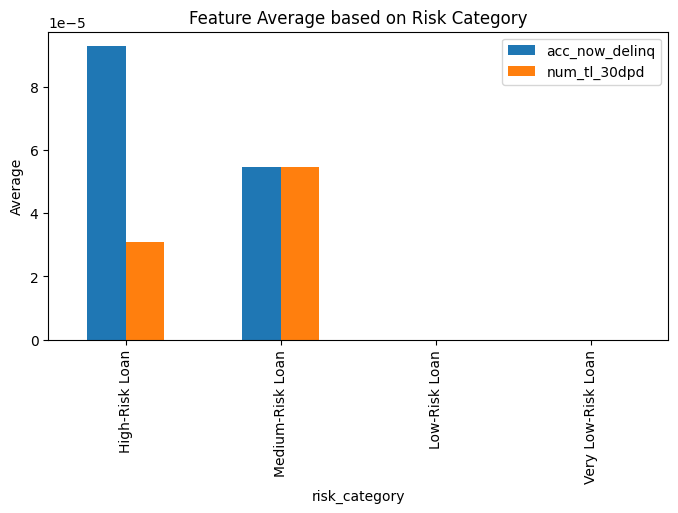

In [33]:
grouped_data = df.groupby('risk_category')[['acc_now_delinq', 'num_tl_30dpd']].mean()
# Bar plot
grouped_data.plot(kind='bar', figsize=(8, 4))
plt.title('Feature Average based on Risk Category')
plt.ylabel('Average')
plt.show()

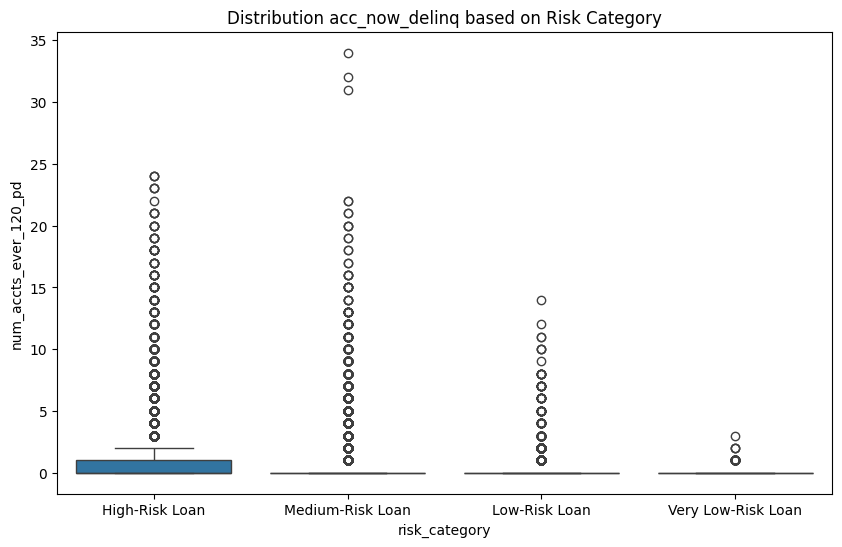

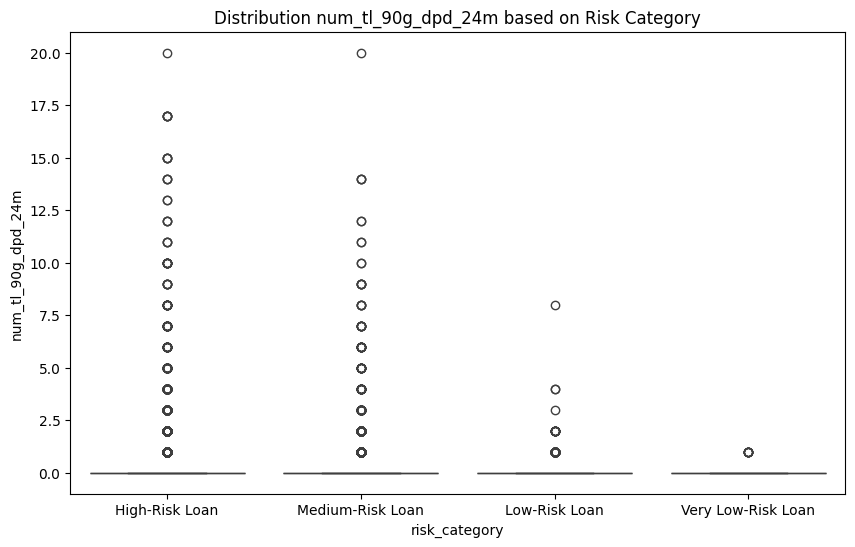

In [35]:
# Boxplot for num_accts_ever_120_pd
plt.figure(figsize=(10, 6))
sns.boxplot(x='risk_category', y='num_accts_ever_120_pd', data=df)
plt.title('Distribution acc_now_delinq based on Risk Category')
plt.show()

# Boxplot for num_tl_90g_dpd_24m
plt.figure(figsize=(10, 6))
sns.boxplot(x='risk_category', y='num_tl_90g_dpd_24m', data=df)
plt.title('Distribution num_tl_90g_dpd_24m based on Risk Category')
plt.show()